In [35]:
# Import packages
import pandas as pd
import matplotlib.pyplot as plt
import math

# Assign datasheet path to variable
file_path = 'data\Characteristics of Retirees.xlsx'

# Read the Excel file into a DataFrame
retirement_characteristics = pd.read_excel(file_path)

#Tidy data that suits how you wish to present the data
columns_to_keep = [0, 1, 2, 3, 4, 5, 8, 11, 14, 17, 20]
new_header = ["Year", "Population of Interest", "Sex", "Classification", "Category", "Retired Age 54 & Under (people in thousands)", "Retired Age 55-59 (people in thousands)", "Retired Age 60-64 (people in thousands)", "Retired Age 65-69 (people in thousands)", "Retired Age 70 & Over (people in thousands)", "Total Retirees (thousands)"]

#Use variables to execute data cleaning
retirement_characteristics = retirement_characteristics.iloc[:, columns_to_keep]
retirement_characteristics.columns = new_header

#Convert data to data frame
raw_data = pd.DataFrame(retirement_characteristics)


In [3]:
new_column_names = {
    'Retired Age 54 & Under (people in thousands)': 'Retired Age 45-54',
    'Retired Age 55-59 (people in thousands)': 'Retired Age 55-59',
    'Retired Age 60-64 (people in thousands)': 'Retired Age 60-64',
    'Retired Age 65-69 (people in thousands)': 'Retired Age 65-69',
    'Retired Age 70 & Over (people in thousands)': 'Retired Age 70 & Over',
}

In [4]:
#Take out the rows containing the totals to prevent compromising the data
tidied_retirement_df = []

for index, row in raw_data.iterrows():
    if row['Category'] != 'TOTAL':
        tidied_retirement_df.append(row)

tidied_retirement_df = pd.DataFrame(tidied_retirement_df)

In [5]:
#List the categories for future reference
categories = raw_data['Category'].unique()
classification = raw_data['Classification'].unique()
pop_interest = raw_data['Population of Interest'].unique()
year = raw_data['Year'].unique()

categories = list(categories)
classification = list(classification)
pop_interest = list(pop_interest)
year = list(year)

In [6]:
#Create data frame without gender specific data 'Persons' as is the total of 'Male' & 'Female' data and unecessary .
generalised_df = []

for index, row in tidied_retirement_df.iterrows():
    if row['Sex'] == 'Persons':
        generalised_df.append(row)

generalised_df = pd.DataFrame(generalised_df)

#Remove 'Sex' column as it is no longer necessary
generalised_df = generalised_df.drop(['Sex'], axis=1)
generalised_df = generalised_df.rename(columns=new_column_names)

In [7]:
#In preparation for creating an income data frame & grouping it, create a dictionary.
#This dictionary will act as a reference to only append relevant data rows to the data frame.
#This dictionary will also allow you to correctly order the data via reference code (considering the dollar values will order alphabetically, not numerically)

income_categories = {
 'No partner': '00',
 'No income (or negative income)': '01',
 '$1 - $200': '02',
 '$200 - $400': '03',
 '$400 - $600': '04',
 '$600 - $800': '05',
 '$800 - $1,000': '06',
 '$1,000 - $2,000': '07',
 '$1,000 - $1,250': '08',
 '$1,250 - $1,500': '09',
 '$1,500 - $2,000': '10',
 '$2,000 or more': '11',
}

income_classification = {
 'Weekly personal income from all sources': 'a',
 "Partner's weekly income from all sources": 'b',
 'Weekly household income from all sources': 'c',
}

In [8]:
#Append data based on category & classification. Drop any unnecessary rows included in the data.
income_df = []

for index, row in generalised_df.iterrows():
    if row['Classification'] in income_classification and row['Category'] in income_categories and row['Category'] != 'Not stated' and row['Population of Interest'] == 'Retired at 45 years and over':
        income_df.append(row)

income_df = pd.DataFrame(income_df)


In [9]:
#Group the charting data by year, classification & category to create chart
income_df = income_df.groupby(['Year','Classification','Category'], as_index=False)[['Retired Age 45-54', 'Retired Age 55-59', 'Retired Age 60-64',	'Retired Age 65-69', 'Retired Age 70 & Over','Total Retirees (thousands)']].median()

#Understanding grouping data will reorganise this data alphabetically (including monetary values under category), create a column to hold references (based on dictionary) to re order the data in an appropriate format
income_df['Reference'] = income_df['Classification'].map(income_classification) + \
    income_df['Category'].map(income_categories)

income_df = income_df.sort_values(['Year','Reference'])

In [39]:
#Prepare data to create visualisation for retiree's income before retiring by age 
chart_data = []

for index, row in income_df.iterrows():
    if row['Year'] == '2020-21':
        chart_data.append(row)

chart_data = pd.DataFrame(chart_data)
chart_data = chart_data.rename(columns=new_column_names)

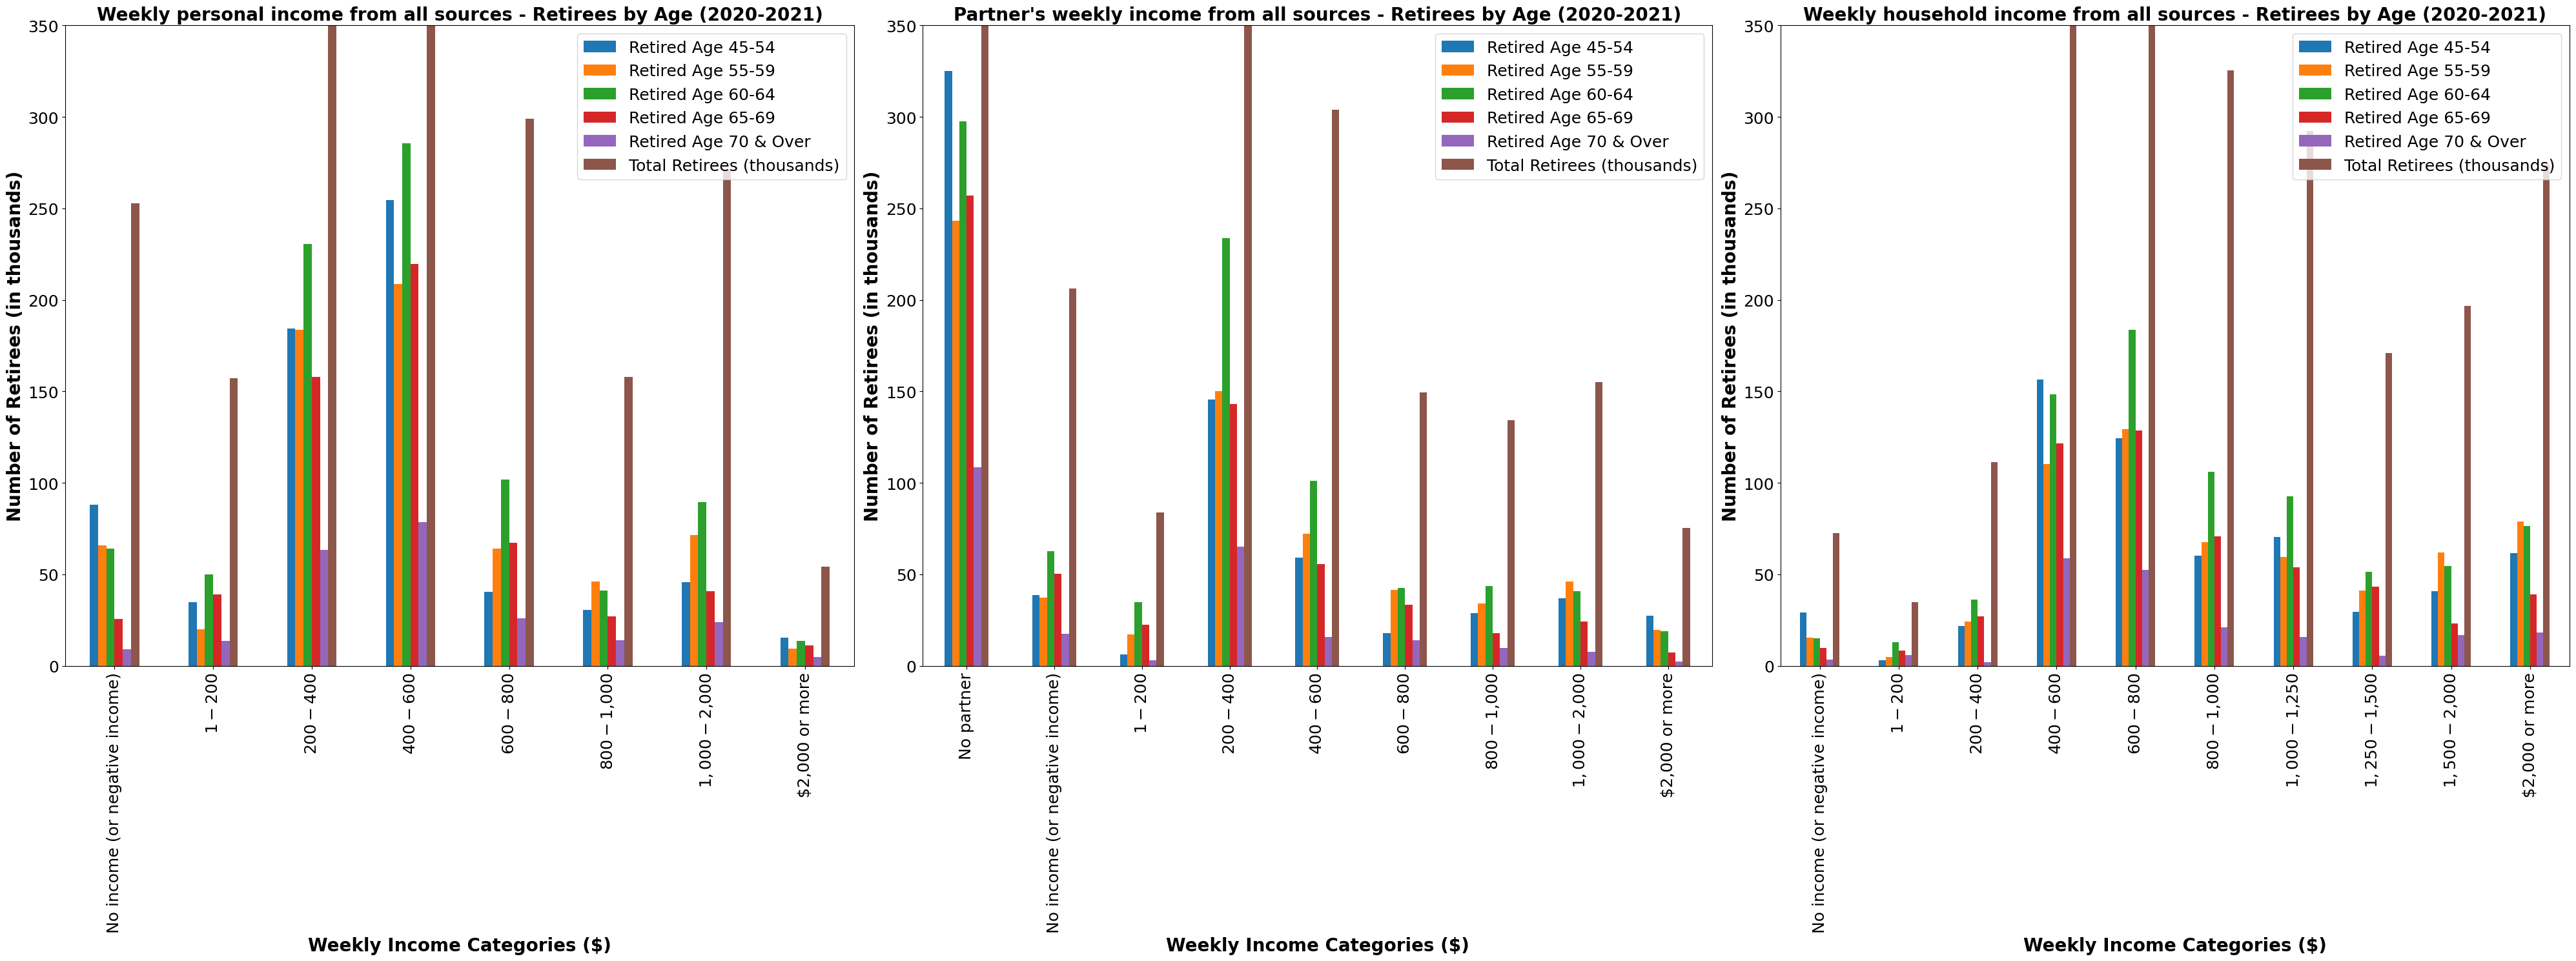

In [11]:
# Create visualisations to how old people were & what their income was before retiring
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(40, 15))

classifications = chart_data['Classification'].unique()


for i, classification in enumerate(classifications):
    subset_df = chart_data[chart_data['Classification'] == classification]
    
    # Sort the DataFrame by the 'Reference' column
    subset_df_sorted = subset_df.sort_values('Reference')

    subset_df_sorted.set_index('Category').plot(kind='bar', stacked=False, ax=axes[i])

    axes[i].set_ylim(0, 350)

    axes[i].set_title(f'{classification} - Retirees by Age (2020-2021)', fontsize=20, fontweight='bold')
    axes[i].set_xlabel('Weekly Income Categories ($)', fontsize=20, fontweight='bold')
    axes[i].set_ylabel('Number of Retirees (in thousands)', fontsize=20, fontweight='bold')

    axes[i].tick_params(axis='x', rotation=90, labelsize=18)
    axes[i].tick_params(axis='y', rotation=0, labelsize=18)
    axes[i].legend(loc='upper right', fontsize=18)

plt.tight_layout()
plt.show()




In [41]:
income_cat_data = []
for index, row in chart_data.iterrows():
    if row['Category'] != 'No partner':
        income_cat_data.append(row)

income_class_data = pd.DataFrame(income_cat_data)

# Use this data to calculate the total difference between the chart_data
income_cat_totals = income_class_data.groupby('Classification',as_index=False)['Total Retirees (thousands)'].sum()
income_cat_totals = pd.DataFrame(income_cat_totals)
income_cat_totals

income_cat_totals

indv_house_dif = (income_cat_totals.iloc[2]['Total Retirees (thousands)'] - income_cat_totals.iloc[1]['Total Retirees (thousands)'])*1000
indv_house_dif = math.ceil(indv_house_dif)
print(f"The difference between sample population of individual income & household income is {indv_house_dif}.")
print(f"This means that {indv_house_dif} people from the 'weekly individual income' chart are not represented in the 'weekly household income' chart.")

The difference between sample population of individual income & household income is 366673.
This means that 366673 people from the 'weekly individual income' chart are not represented in the 'weekly household income' chart.


In [12]:
#Prepare data for visualisation illustrating the difference in the pre retirement incomes
chart_data2 = []

for index, row in income_df.iterrows():
    if row['Year'] == '2020-21':
        chart_data2.append(row)

chart_data2 = pd.DataFrame(chart_data2)
chart_data2 = chart_data2.iloc[:,[0,1,2,8,9]]
chart_data2['Numeric_Reference'] = chart_data2['Reference'].str.extract('(\d+)')

In [13]:
#Categorise the data (Can utilise numeric reference to append the results accordingly)
classifications = chart_data2['Classification'].unique()

more_than_600 = {classification: [] for classification in classifications}
between_400_600 = {classification: [] for classification in classifications}
less_than_400 = {classification: [] for classification in classifications}

for index, row in chart_data2.iterrows():
    numeric_reference = row['Numeric_Reference']

    if numeric_reference is not None:
        numeric_reference = int(numeric_reference)
        if numeric_reference > 4:
            more_than_600[row['Classification']].append(row['Total Retirees (thousands)'])
        elif numeric_reference <4 and numeric_reference >0:
            less_than_400[row['Classification']].append(row['Total Retirees (thousands)'])
        elif numeric_reference ==4:
            between_400_600[row['Classification']].append(row['Total Retirees (thousands)'])


more_than_600 = {classification: sum(values) for classification, values in more_than_600.items()}
between_400_600 = {classification: sum(values) for classification, values in between_400_600.items()}
less_than_400 = {classification: sum(values) for classification, values in less_than_400.items()}

more_than_600_num = [value for value in more_than_600.values()]
between_400_600_num = [value for value in between_400_600.values()]
less_than_400_num = [value for value in less_than_400.values()]

more_than_600_words = list(more_than_600.keys())
between_400_600_words = list(between_400_600.keys())
less_than_400_words = list(less_than_400.keys())


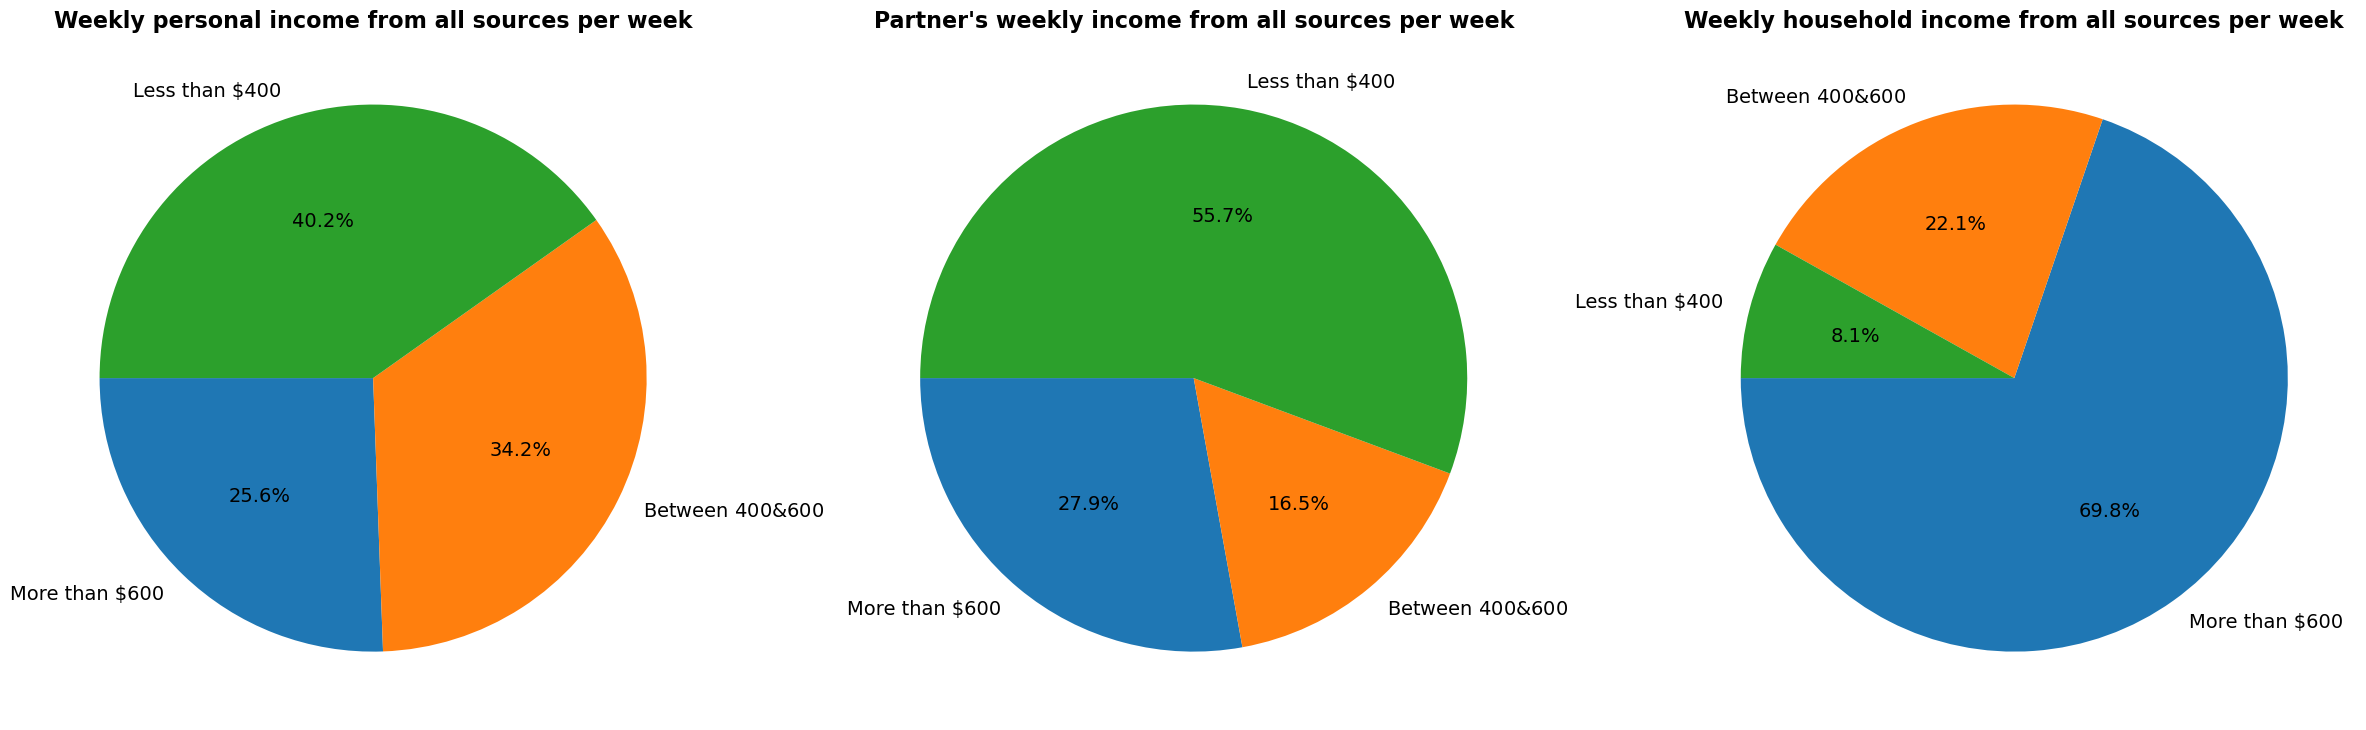

In [14]:
# Plot the data into pie charts
labels = ['More than $600', 'Between $400  &  $600', 'Less than $400']

comparison_values = []

for i in range(len(more_than_600_num)):
    comparison_values.append([more_than_600_num[i], between_400_600_num[i], less_than_400_num[i]])

fig, axs = plt.subplots(1, len(more_than_600_num), figsize=(10 * len(more_than_600_num), 10))

for i in range(len(more_than_600_num)):
    axs[i].pie(comparison_values[i], labels=labels, autopct='%1.1f%%', startangle=180, textprops={'fontsize': 14})
    axs[i].set_title(f'{more_than_600_words[i]} per week', fontsize=16, fontweight='bold')

plt.show()